**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [108]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind,ttest_ind_from_stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import scipy.stats as stats  
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

# import data 2C_weka.csv for 2 Class Classifcation.


In [109]:
c2 = pd.read_csv('2Classdata.csv')
c2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

# Head of Dataset

In [110]:
c2.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Tail of Dataset

In [111]:
c2.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


# Looking for missing value

In [112]:
c2.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [113]:
c2.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Looking for unique values for Class attribute

In [114]:
c2['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

# Looking for distribution of Class attribute

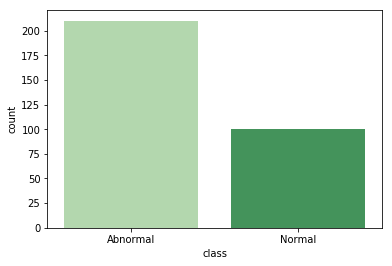

In [115]:
sns.countplot(c2['class'],alpha = 1,palette="Greens");

# Looking for distribution of other attribute except class

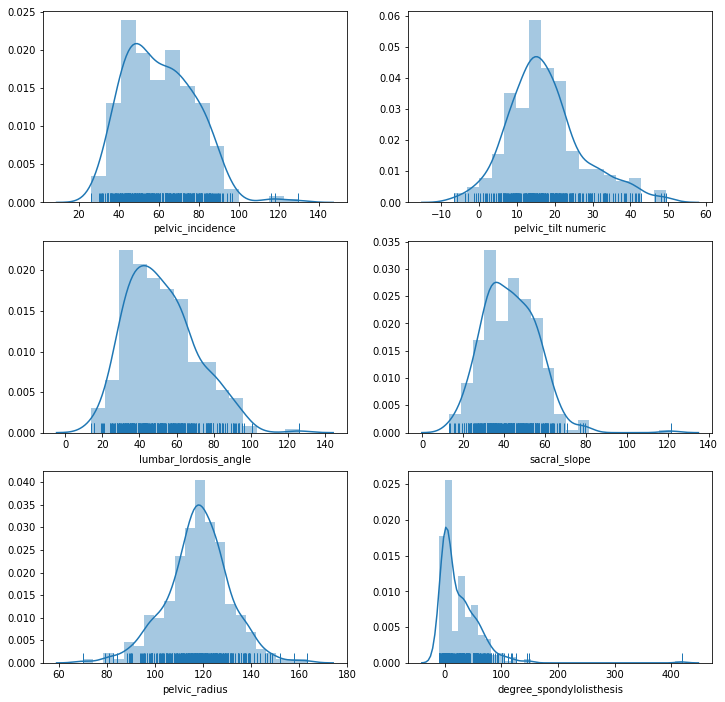

In [116]:
fig, axs = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.distplot(c2.pelvic_incidence,hist=True,kde=True,rug=True,ax=axs[0,0]);
sns.distplot(c2['pelvic_tilt numeric'],hist=True,kde=True,rug=True,ax=axs[0,1]);
sns.distplot(c2.lumbar_lordosis_angle,hist=True,kde=True,rug=True,ax=axs[1,0]);
sns.distplot(c2.sacral_slope,hist=True,kde=True,rug=True,ax=axs[1,1]);
sns.distplot(c2.pelvic_radius,hist=True,kde=True,rug=True,ax=axs[2,0]);
sns.distplot(c2.degree_spondylolisthesis,hist=True,kde=True,rug=True,ax=axs[2,1]);

# Looking for distribution of all attribute with respect to Class

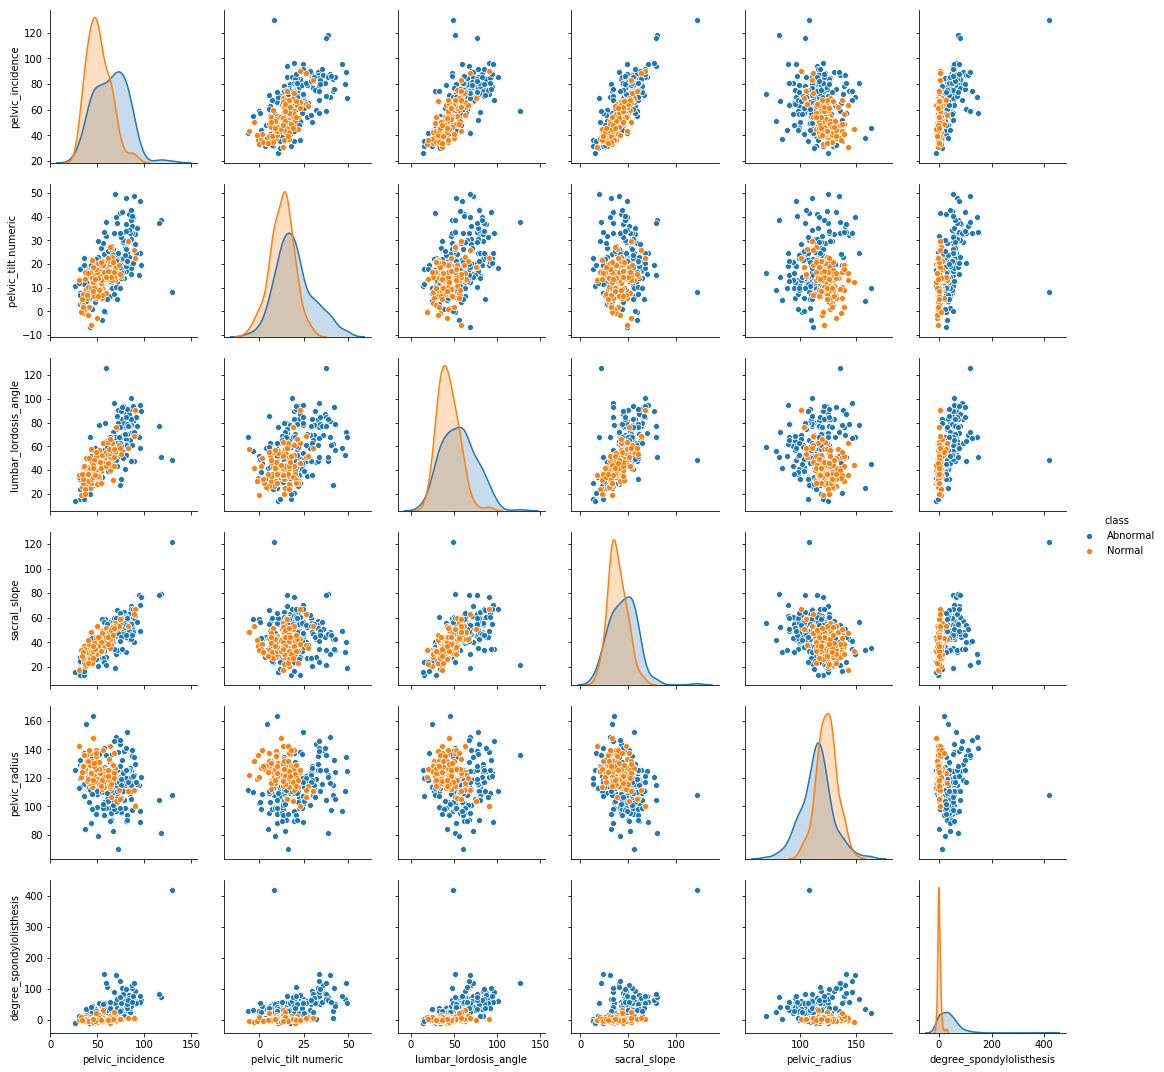

In [117]:
sns.pairplot(c2,hue='class');

# Datatypes of attribute of dataset c2

In [118]:
c2.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# distribution of different classes for pelvic_radius and sacral_slope

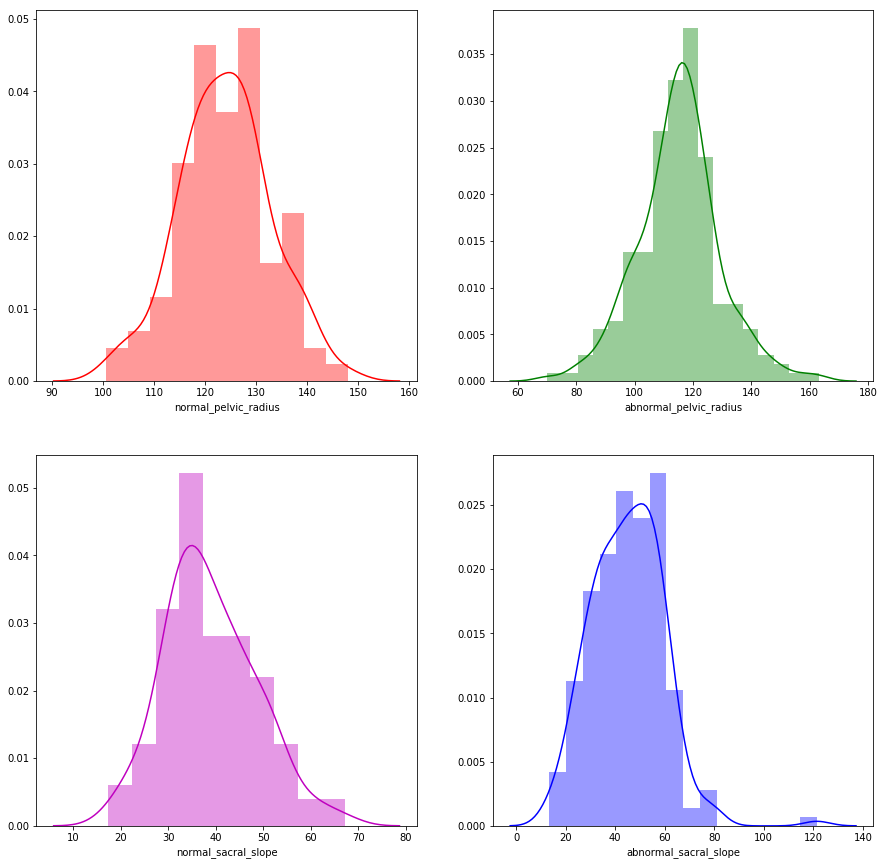

In [119]:
normal_pelvic_radius = c2[c2['class'] == 'Normal']['pelvic_radius']
abnormal_pelvic_radius = c2[c2['class'] == 'Abnormal']['pelvic_radius']
normal_sacral_slope = c2[c2['class'] == 'Normal']['sacral_slope']
abnormal_sacral_slope = c2[c2['class'] == 'Abnormal']['sacral_slope']
fig, axs = plt.subplots(figsize=(15,15), ncols=2, nrows=2)
sns.distplot(normal_pelvic_radius,ax=axs[0,0],axlabel='normal_pelvic_radius',color='r',norm_hist=False);
sns.distplot(abnormal_pelvic_radius,ax=axs[0,1],axlabel='abnormal_pelvic_radius',color='g',norm_hist=False);
sns.distplot(normal_sacral_slope,ax=axs[1,0],axlabel='normal_sacral_slope',color='m',norm_hist=False);
sns.distplot(abnormal_sacral_slope,ax=axs[1,1],axlabel='abnormal_sacral_slope',color='b',norm_hist=False);

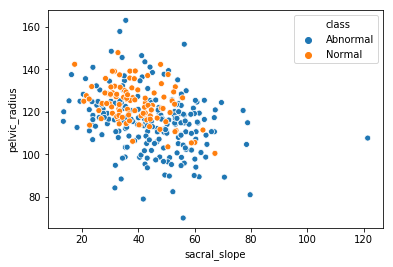

In [120]:
sns.scatterplot(c2.sacral_slope,c2.pelvic_radius,hue = c2['class'])

# Encode the Class variable to integer.

In [121]:
from sklearn.preprocessing import LabelEncoder

In [122]:
le = LabelEncoder()

In [123]:
c2['class'] = le.fit_transform(c2['class'])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [124]:
X = c2.drop(columns= "class")
y = c2["class"]

# Split the dat as train and test with a ratio of 70:30.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

# Normalize your Data (X) to get values between 0 to 1.

In [149]:
stdscale = StandardScaler()

In [150]:
pd.DataFrame(stdscale.fit_transform(X_train),columns = X_train.columns)
pd.DataFrame(stdscale.transform(X_test),columns = X_test.columns)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.437530,0.019186,0.436985,0.526650,-0.602639,0.164977
1,0.177570,1.040279,-0.018027,-0.518367,-0.326630,-0.471018
2,1.863276,0.748397,1.741106,1.770073,-0.098058,0.646353
3,0.742648,0.013241,0.003019,0.907619,0.055818,0.139033
4,-0.313431,-0.532747,-0.583088,-0.009265,-0.070697,0.343642
5,0.614548,-0.390844,0.493217,1.035966,-1.319574,-0.023444
6,-1.552125,-1.257386,-0.815333,-1.024963,0.443521,-0.659932
7,0.712619,0.768271,1.488214,0.335173,-0.925073,0.740403
8,1.479829,1.274962,1.673539,0.923232,0.685676,1.108753
9,0.555252,0.169418,1.280004,0.565485,-1.217986,-0.665976


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [160]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [161]:
print(knn.score(X_test,y_test))

0.8817204301075269


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [162]:
res = []
j=1
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_pred = knn.predict(X_test)
    res.append([accuracy_score(y_test, test_pred),j])
    j+=1
k_val = pd.DataFrame(res,columns=['k_score','k_val'])

In [163]:
k_val.sort_values('k_score',ascending = False,inplace=True)
k_val.head()

,k_score,k_val
17,0.881720,18
16,0.870968,17
15,0.870968,16
21,0.870968,22
13,0.870968,14


#### As per above data, Accuracy score is high for K-Value 18. We can select K-Value = 18

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [165]:
c3 = pd.read_csv('3Classdata.csv')

# Head of Dataset

In [166]:
c3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


# Tail of Dataset

In [167]:
c3.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

# Looking for missing value

In [168]:
c3.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [169]:
c3.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Looking for datatype of all attributes of dataset c3

In [176]:
c3.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

# Looking for unique values for attribute Class

In [177]:
c3['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

# Looking for distribution of Class attribute

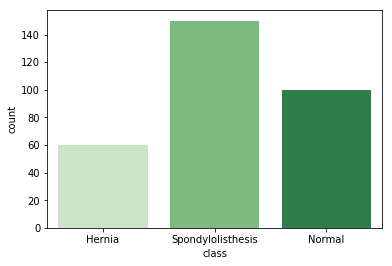

In [178]:
sns.countplot(c3['class'],alpha = 1,palette="Greens");

# Looking for distribution of other attribute except Class

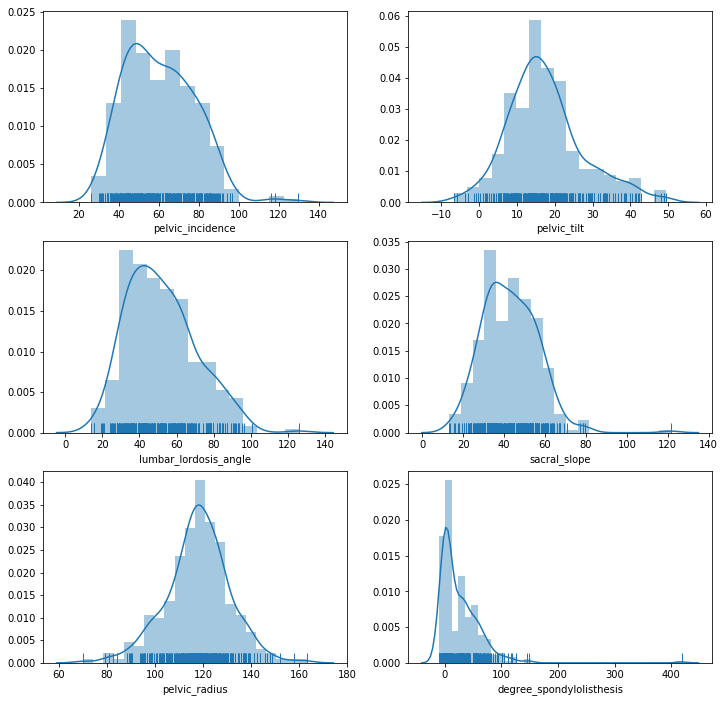

In [179]:
fig, axs = plt.subplots(figsize=(12,12), ncols=2, nrows=3)
sns.distplot(c3.pelvic_incidence,hist=True,kde=True,rug=True,ax=axs[0,0]);
sns.distplot(c3.pelvic_tilt,hist=True,kde=True,rug=True,ax=axs[0,1]);
sns.distplot(c3.lumbar_lordosis_angle,hist=True,kde=True,rug=True,ax=axs[1,0]);
sns.distplot(c3.sacral_slope,hist=True,kde=True,rug=True,ax=axs[1,1]);
sns.distplot(c3.pelvic_radius,hist=True,kde=True,rug=True,ax=axs[2,0]);
sns.distplot(c3.degree_spondylolisthesis,hist=True,kde=True,rug=True,ax=axs[2,1]);

# Looking for distribution of all attribute with respect to Class

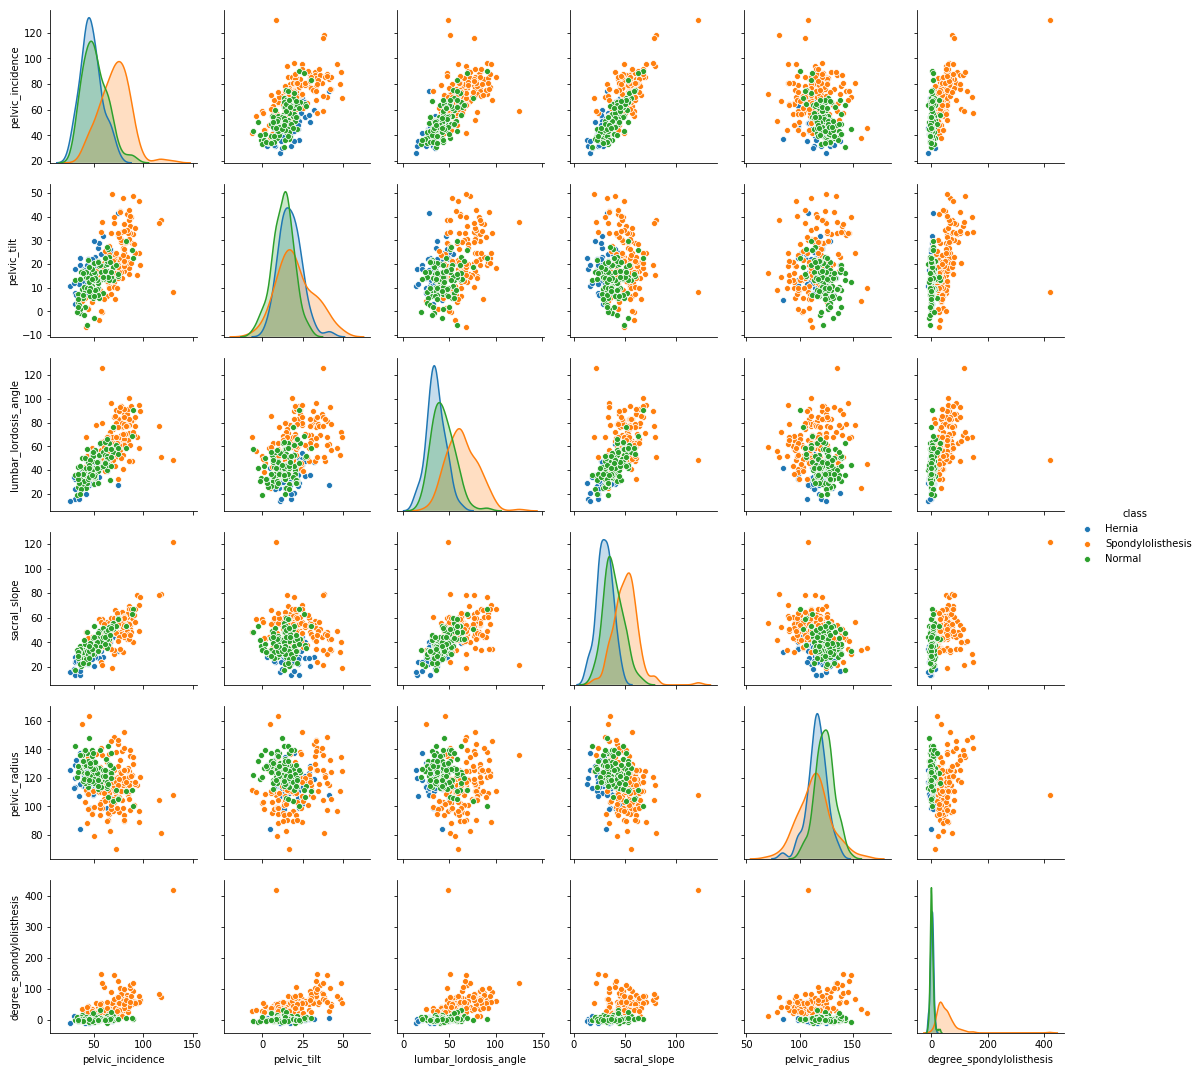

In [181]:
sns.pairplot(c3,hue='class');

# distribution of different classes for pelvic_radius and sacral_slope

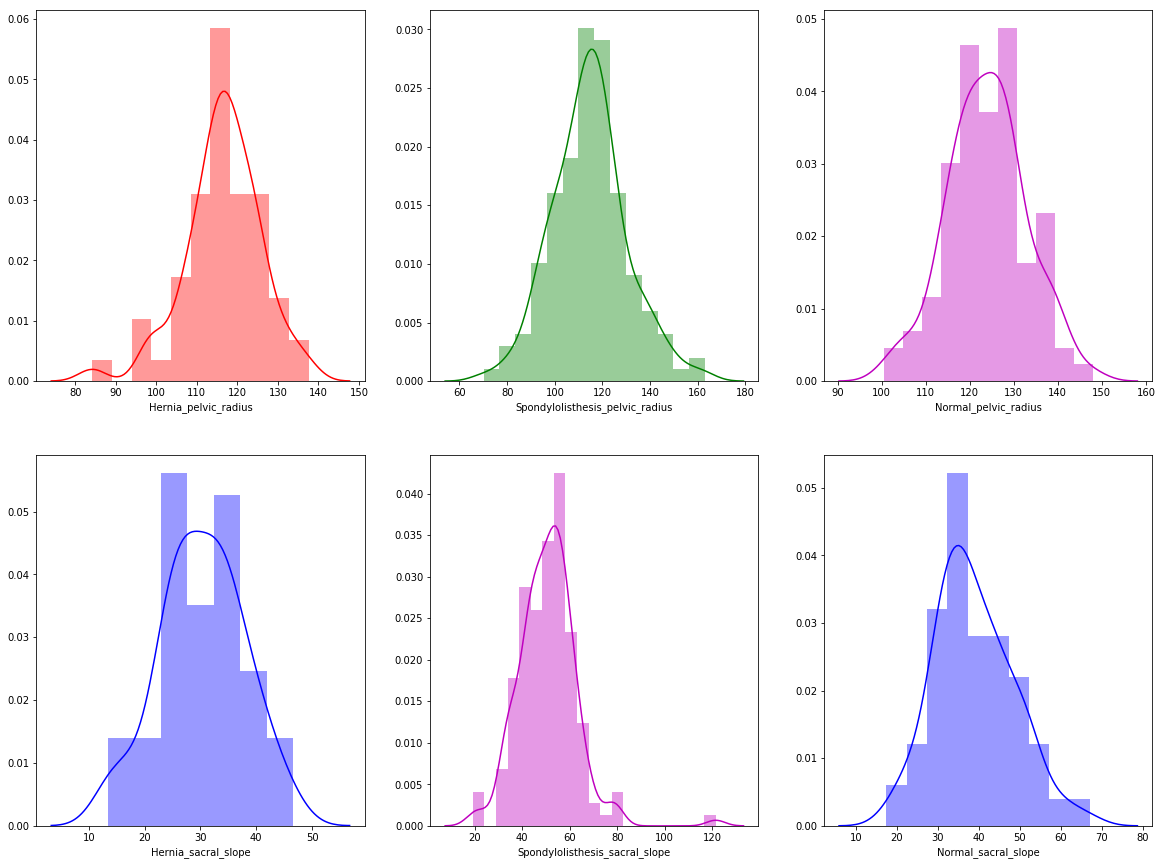

In [190]:
her_pelvic_radius = c3[c3['class'] == 'Hernia']['pelvic_radius']
spond_pelvic_radius = c3[c3['class'] == 'Spondylolisthesis']['pelvic_radius']
normal_pelvic_radius = c3[c3['class'] == 'Normal']['pelvic_radius']
her_sacral_slope = c3[c3['class'] == 'Hernia']['sacral_slope']
spond_sacral_slope = c3[c3['class'] == 'Spondylolisthesis']['sacral_slope']
normal_sacral_slope = c3[c3['class'] == 'Normal']['sacral_slope']
fig, axs = plt.subplots(figsize=(20,15), ncols=3, nrows=2)
sns.distplot(her_pelvic_radius,ax=axs[0,0],axlabel='Hernia_pelvic_radius',color='r',norm_hist=False);
sns.distplot(spond_pelvic_radius,ax=axs[0,1],axlabel='Spondylolisthesis_pelvic_radius',color='g',norm_hist=False);
sns.distplot(normal_pelvic_radius,ax=axs[0,2],axlabel='Normal_pelvic_radius',color='m',norm_hist=False);
sns.distplot(her_sacral_slope,ax=axs[1,0],axlabel='Hernia_sacral_slope',color='b',norm_hist=False);
sns.distplot(spond_sacral_slope,ax=axs[1,1],axlabel='Spondylolisthesis_sacral_slope',color='m',norm_hist=False);
sns.distplot(normal_sacral_slope,ax=axs[1,2],axlabel='Normal_sacral_slope',color='b',norm_hist=False);

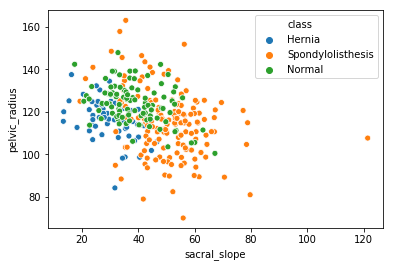

In [191]:
sns.scatterplot(c3.sacral_slope,c3.pelvic_radius,hue = c3['class'])

# Encode the Class variable to integer.

In [206]:
from sklearn.preprocessing import LabelEncoder

In [207]:
le = LabelEncoder()

In [208]:
c3['class'] = le.fit_transform(c3['class'])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [214]:
X_1 = c3.drop(columns= "class")
y_1 = c3["class"]

# Split the dat as train and test with a ratio of 70:30.

In [219]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1,test_size=0.3,random_state = 1)

# Normalize your Data (X) to get values between 0 to 1.

In [220]:
stdscale = StandardScaler()

In [221]:
pd.DataFrame(stdscale.fit_transform(X_1_train),columns = X_1_train.columns)
pd.DataFrame(stdscale.transform(X_1_test),columns = X_1_test.columns)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.437530,0.019186,0.436985,0.526650,-0.602639,0.164977
1,0.177570,1.040279,-0.018027,-0.518367,-0.326630,-0.471018
2,1.863276,0.748397,1.741106,1.770073,-0.098058,0.646353
3,0.742648,0.013241,0.003019,0.907619,0.055818,0.139033
4,-0.313431,-0.532747,-0.583088,-0.009265,-0.070697,0.343642
5,0.614548,-0.390844,0.493217,1.035966,-1.319574,-0.023444
6,-1.552125,-1.257386,-0.815333,-1.024963,0.443521,-0.659932
7,0.712619,0.768271,1.488214,0.335173,-0.925073,0.740403
8,1.479829,1.274962,1.673539,0.923232,0.685676,1.108753
9,0.555252,0.169418,1.280004,0.565485,-1.217986,-0.665976


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_1_train,y_1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [239]:
knn.predict(X_1_test)

array([2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 0, 1, 2], dtype=int64)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [242]:
print(knn.score(X_1_test,y_1_test))

0.8602150537634409


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [233]:
res = []
j=1
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_1_train,y_1_train)
    test_1_pred = knn.predict(X_1_test)
    res.append([accuracy_score(y_1_test, test_1_pred),j])
    j+=1
k_val = pd.DataFrame(res,columns=['k_score','k_val'])

In [234]:
k_val.sort_values('k_score',ascending = False,inplace=True)
k_val.head()

,k_score,k_val
12,0.860215,13
13,0.860215,14
17,0.849462,18
8,0.849462,9
11,0.849462,12


#### As per above data, Accuracy score is high for K-Value 13. We can select K-Value = 13.